In [62]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
fraud = pd.read_csv(r"C:\Users\user\Downloads\Fraud Detection Dataset.csv")

In [64]:
fraud.head(3)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0


In [65]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [66]:
crr = fraud.select_dtypes(include=["int64", "Float64"])

In [67]:
fraud.drop(columns="Transaction_ID",axis=1,inplace= True)
fraud.drop(columns="User_ID",axis=1,inplace= True)

In [68]:
fraud.describe()

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [69]:
fraud.head(10)

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


In [70]:
fraud.isnull().sum()

Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [71]:
fraud['Transaction_Amount'].fillna(fraud['Transaction_Amount'].mean(), inplace=True)
fraud['Time_of_Transaction'].fillna(fraud['Time_of_Transaction'].mean(), inplace=True)
fraud['Device_Used'].fillna(fraud['Device_Used'].mode()[0], inplace=True)
fraud['Location'].fillna(fraud['Location'].mode()[0], inplace=True)
fraud['Payment_Method'].fillna(fraud['Payment_Method'].mode()[0], inplace=True)

In [72]:
fraud_data = fraud[fraud['Fraudulent'] == 1]
fraud_data.head(10)

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
6,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
27,4519.04,Bill Payment,13.0,Tablet,Boston,0,81,10,Credit Card,1
43,4413.05,Bank Transfer,21.0,Desktop,Boston,4,46,11,Credit Card,1
68,3517.65,Bill Payment,0.0,Desktop,Boston,2,29,8,UPI,1
73,1440.79,Online Purchase,15.0,Tablet,Miami,2,16,1,Net Banking,1
81,2494.27,Bank Transfer,13.0,Desktop,San Francisco,3,44,6,UPI,1
84,1383.11,ATM Withdrawal,12.0,Mobile,Boston,3,20,11,Credit Card,1
130,606.51,Bill Payment,17.0,Desktop,Boston,4,42,8,Debit Card,1
159,1745.20,Online Purchase,12.0,Mobile,Seattle,2,48,3,Net Banking,1
173,4739.20,Bill Payment,2.0,Tablet,Boston,3,82,12,Debit Card,1


In [73]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_Amount                51000 non-null  float64
 1   Transaction_Type                  51000 non-null  object 
 2   Time_of_Transaction               51000 non-null  float64
 3   Device_Used                       51000 non-null  object 
 4   Location                          51000 non-null  object 
 5   Previous_Fraudulent_Transactions  51000 non-null  int64  
 6   Account_Age                       51000 non-null  int64  
 7   Number_of_Transactions_Last_24H   51000 non-null  int64  
 8   Payment_Method                    51000 non-null  object 
 9   Fraudulent                        51000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 3.9+ MB


In [74]:
fraud['Amount_per_Account_Age'] = fraud['Transaction_Amount'] / (fraud['Account_Age']+1)
fraud['Txn_per_Day_Ratio'] = fraud['Number_of_Transactions_Last_24H'] / (fraud['Account_Age']+1)
fraud['Fraud_Risk_Score'] = fraud['Previous_Fraudulent_Transactions'] * fraud['Transaction_Amount']


In [75]:
fraud = fraud.drop('Transaction_Amount', axis=1)
fraud = fraud.drop('Account_Age', axis=1)
fraud = fraud.drop('Number_of_Transactions_Last_24H', axis=1)
fraud = fraud.drop('Previous_Fraudulent_Transactions', axis=1)


In [76]:
fraud.head(2)

,Transaction_Type,Time_of_Transaction,Device_Used,Location,Payment_Method,Fraudulent,Amount_per_Account_Age,Txn_per_Day_Ratio,Fraud_Risk_Score
0,ATM Withdrawal,16.0,Tablet,San Francisco,Debit Card,0,10.77300,0.108333,0.00
1,ATM Withdrawal,13.0,Mobile,New York,Credit Card,0,19.43225,0.037500,6218.32


In [77]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction_Type        51000 non-null  object 
 1   Time_of_Transaction     51000 non-null  float64
 2   Device_Used             51000 non-null  object 
 3   Location                51000 non-null  object 
 4   Payment_Method          51000 non-null  object 
 5   Fraudulent              51000 non-null  int64  
 6   Amount_per_Account_Age  51000 non-null  float64
 7   Txn_per_Day_Ratio       51000 non-null  float64
 8   Fraud_Risk_Score        51000 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.5+ MB


In [78]:
num_col = ["Amount_per_Account_Age", "Time_of_Transaction",	"Txn_per_Day_Ratio","Fraud_Risk_Score"]

In [79]:
for col in num_col:
    q1 = fraud[col].quantile(0.25)
    q3 = fraud[col].quantile(0.75)

    iqr = q3 - q1
    
    min_range = q1- 1.5 * iqr 
    max_range = q3 + 1.5 * iqr

    fraud= fraud[(fraud[col] >= min_range) & (fraud[col] <= max_range)]


In [80]:
cat_col = fraud.select_dtypes(include="object").columns.tolist()
print(cat_col)

['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']


In [81]:
fraud = pd.get_dummies(fraud, columns=cat_col, drop_first= True)
 

In [82]:
bool_cols = fraud.select_dtypes(include='bool').columns

fraud[bool_cols] = fraud[bool_cols].astype(int)

In [83]:
x = fraud.drop("Fraudulent", axis= 1)
y = fraud["Fraudulent"]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train , y_test = train_test_split(x,y ,test_size= 0.2, random_state= 42)


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [88]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)


In [89]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight= "balanced")
dt.fit(x_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [91]:
dt.score(x_train, y_train), dt.score(x_test, y_test)

(1.0, 0.8882803943044907)

In [92]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier(n_estimators = 100,
    criterion= "gini",
    max_depth= 9,
    min_samples_split= 2,)
rd.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [93]:
rd.score(x_train, y_train), rd.score(x_test, y_test)

(0.7858103348914645, 0.6558354630643787)

In [94]:
df = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "splitter": ['best', 'random'],
    "max_depth": [8],
    "min_samples_leaf": [10]
 }

In [95]:
from sklearn.model_selection import GridSearchCV
gd = { "n_estimators": [100],
    "criterion":['gini', 'entropy', 'log_loss'],
    "max_depth": [7],
    "min_samples_leaf": [1]
}
grd = GridSearchCV(RandomForestClassifier(), param_grid= gd)
grd.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [7], 'min_samples_leaf': [1], 'n_estimators': [100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [96]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions= gd, n_iter= 20)

In [97]:
rs.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [7], 'min_samples_leaf': [1], 'n_estimators': [100]}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [98]:
grd.score(x_train, y_train), grd.score(x_test, y_test)

(0.7322949350067235, 0.5750273822562979)

In [99]:
rs.score(x_train, y_train), rs.score(x_test, y_test)

(0.7265319843760005, 0.5691858342460752)

In [100]:
from sklearn.ensemble import VotingClassifier
le = [("dt",DecisionTreeClassifier()), ("rd",RandomForestClassifier()), ("sv",SVC())]
vi = VotingClassifier(le)
vi.fit(x_train, y_train)

,estimators,"[('dt', ...), ('rd', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [101]:
prd = {"dt":dt.predict(x_test),"rd":rd.predict(x_test),"sv":sv.predict(x_test), "vi":dt.predict(x_test)}

In [102]:
vi.score(x_train, y_train), vi.score(x_test, y_test)

(1.0, 0.9208957040282342)

In [103]:
from sklearn.model_selection import cross_val_score
scor = cross_val_score(rd,x_test, y_test, cv=3, scoring= "accuracy")

In [104]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,vi.predict(x_test)))

0.07910429597176585


In [105]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score

In [106]:
confusion_matrix(y_test,vi.predict(x_test))

array([[7542,  277],
       [ 373,   25]])

In [107]:
precision_score(y_test,vi.predict(x_test))*100

8.27814569536424

In [108]:
recall_score(y_test, vi.predict(x_test))

0.06281407035175879

In [109]:
f1_score(y_test,vi.predict(x_test))

0.07142857142857142

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
# FUNCTION: Model Evaluation
# ================================
def evaluate_model(vi, x_test, y_test):
    
    # 1️⃣ Predict
    y_pred = vi.predict(x_test)

    # 2️⃣ DataFrame
    df = pd.DataFrame({
        "Actual": y_test.values if hasattr(y_test, "values") else y_test,
        "Predicted": y_pred
    })

    # 3️⃣ Error
    df["Error"] = np.abs(df["Actual"] - df["Predicted"])

    # 4️⃣ Top 10 Best Predictions
    top10_best = df.sort_values("Error").head(10)

    # 5️⃣ Top 10 Worst Predictions
    top10_worst = df.sort_values("Error", ascending=False).head(10)

    print("\n🔹 Top 10 Best Predictions")
    print(top10_best)

    print("\n🔹 Top 10 Worst Predictions")
    print(top10_worst)

    # ================================
    # GRAPH: Actual vs Predicted
    # ================================
    plt.figure(figsize=(10,6))
    plt.scatter(df["Actual"], df["Predicted"])
    plt.plot([df["Actual"].min(), df["Actual"].max()],
             [df["Actual"].min(), df["Actual"].max()])
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()

    return df, top10_best, top10_worst



🔹 Top 10 Best Predictions
      Actual  Predicted  Error
8213       0          0      0
17         0          0      0
18         0          0      0
19         0          0      0
20         0          0      0
21         0          0      0
22         0          0      0
7868       0          0      0
24         0          0      0
25         0          0      0

🔹 Top 10 Worst Predictions
      Actual  Predicted  Error
2046       1          0      1
3792       1          0      1
629        0          1      1
2237       0          1      1
2950       0          1      1
1405       1          0      1
327        0          1      1
3243       1          0      1
329        1          0      1
3793       1          0      1


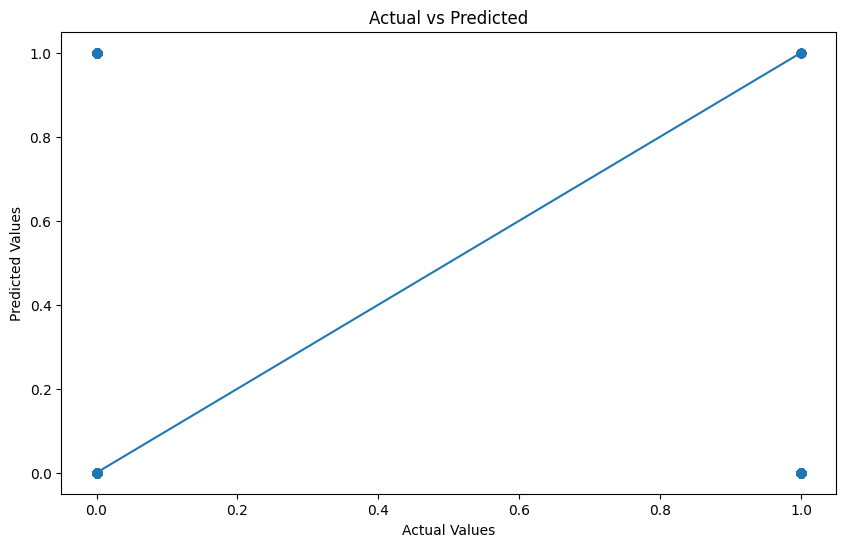

(      Actual  Predicted  Error
 0          0          0      0
 1          0          0      0
 2          0          0      0
 3          0          0      0
 4          0          0      0
 ...      ...        ...    ...
 8212       1          0      1
 8213       0          0      0
 8214       0          0      0
 8215       0          0      0
 8216       0          0      0
 
 [8217 rows x 3 columns],
       Actual  Predicted  Error
 8213       0          0      0
 17         0          0      0
 18         0          0      0
 19         0          0      0
 20         0          0      0
 21         0          0      0
 22         0          0      0
 7868       0          0      0
 24         0          0      0
 25         0          0      0,
       Actual  Predicted  Error
 2046       1          0      1
 3792       1          0      1
 629        0          1      1
 2237       0          1      1
 2950       0          1      1
 1405       1          0      1
 327       

In [111]:
evaluate_model(vi, x_test, y_test)
